In [87]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
from happytransformer import HappyWordPrediction
from happytransformer import WPTrainArgs,WPEvalArgs

In [46]:
happy_wp_distilbert = HappyWordPrediction("DISTILBERT", "distilbert-base-uncased")
happy_wp_albert = HappyWordPrediction("ALBERT", "albert-base-v2")
happy_wp_bert = HappyWordPrediction("BERT", "bert-base-uncased")
happy_wp_roberta = HappyWordPrediction("ROBERTA", "roberta-base")

04/10/2023 20:58:06 - INFO - happytransformer.happy_transformer -   Using model: cpu
04/10/2023 20:58:07 - INFO - happytransformer.happy_transformer -   Using model: cpu


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


04/10/2023 20:59:26 - INFO - happytransformer.happy_transformer -   Using model: cpu
04/10/2023 20:59:28 - INFO - happytransformer.happy_transformer -   Using model: cpu


## Training DistilBert Transformer Model on Merged_Articles

In [47]:
from happytransformer import WPTrainArgs
args = WPTrainArgs(num_train_epochs=2)
happy_wp_distilbert.train("merged_articles.txt", args=args)

04/10/2023 21:00:44 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


  0%|          | 0/1 [00:00<?, ?it/s]

04/10/2023 21:00:45 - INFO - happytransformer.happy_transformer -   Training...
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,3.029600


## Saving the  DistilBert model

In [71]:
happy_wp_distilbert.save("model/distilbert")

## Evaluating DistilBert Model on Yelp Reviews Dataset (Test set)

In [43]:
from happytransformer import WPEvalArgs
args = WPEvalArgs(preprocessing_processes=2)
result_yelp_db = happy_wp_distilbert.eval("/Users/maheshbabu/Desktop/NLP-Next-Word-Predictor/yelp-reviews.txt",args=args)

print(result_yelp_db.loss)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /Users/maheshbabu/.cache/huggingface/datasets/text/default-8acf18d43e4451b3/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map (num_proc=2):   0%|          | 0/34611 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (787 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (611 > 512). Running this sequence through the model will result in indexing errors


Map (num_proc=2):   0%|          | 0/34611 [00:00<?, ? examples/s]

EvalResult(loss=2.997243881225586)
2.997243881225586


## Sample Next word Predictions using DistilBert Model

In [74]:
while True:
    try:
        text = input("Enter the sentence by adding '[MASK]' token where you want to predict':\t")
        print("-"*30)
        results = happy_wp_distilbert.predict_mask(text,top_k = 10)
        print("Top 10 predictions with their probablities: ")
        final_res = [(result.token , result.score) for result in results]
        for res in final_res:
            print(res)
        print("-"*30)
    except:
        print("End of testing")
        break

Enter the sentence by adding '[MASK]' token where you want to predict':	What do you want to [MASK]?
------------------------------
Top 10 predictions with their probablities: 
('do', 0.46310141682624817)
('know', 0.1661476492881775)
('see', 0.08951964974403381)
('say', 0.058391038328409195)
('learn', 0.05489548295736313)
('hear', 0.039477113634347916)
('discuss', 0.0191478468477726)
('decide', 0.005705786403268576)
('have', 0.0047843060456216335)
('eat', 0.004647744819521904)
------------------------------
Enter the sentence by adding '[MASK]' token where you want to predict':	
------------------------------
End of testing


---

## Training Albert Transformer Model on Merged_Articles

In [67]:
happy_wp_albert = HappyWordPrediction("ALBERT", "albert-base-v2")

04/10/2023 21:20:22 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [68]:
from happytransformer import WPTrainArgs
args = WPTrainArgs(num_train_epochs=2)
happy_wp_albert.train("merged_articles.txt", args=args)

04/10/2023 21:21:17 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/9335 [00:00<?, ? examples/s]

Map:   0%|          | 0/9335 [00:00<?, ? examples/s]

04/10/2023 21:21:19 - INFO - happytransformer.happy_transformer -   Training...
You're using a AlbertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,3.173700


## Evaluating Albert Transformer Model on Yelp Reviews Dataset (Test set)

In [70]:
from happytransformer import WPEvalArgs
args = WPEvalArgs(preprocessing_processes=2)
result_yelp_al = happy_wp_albert.eval("/Users/maheshbabu/Desktop/NLP-Next-Word-Predictor/yelp-reviews.txt",args=args)

print(result_yelp_al.loss)

  0%|          | 0/1 [00:00<?, ?it/s]

Map (num_proc=2):   0%|          | 0/34611 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (621 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (801 > 512). Running this sequence through the model will result in indexing errors


Map (num_proc=2):   0%|          | 0/34611 [00:00<?, ? examples/s]

2.8632161617279053


## Saving the Albert Model

In [72]:
happy_wp_albert.save("model/Albert")

## Sample Next word Predictions using Albert Transformer Model

In [73]:
while True:
    try:
        text = input("Enter the sentence by adding '[MASK]' token where you want to predict':\t")
        print("-"*30)
        results = happy_wp_albert.predict_mask(text,top_k = 10)
        print("Top 10 predictions with their probablities: ")
        final_res = [(result.token , result.score) for result in results]
        for res in final_res:
            print(res)
        print("-"*30)
    except:
        print("End of testing")
        break

Enter the sentence by adding '[MASK]' token where you want to predict':	What do you want to [MASK]?
------------------------------
Top 10 predictions with their probablities: 
('know', 0.45058250427246094)
('see', 0.14058028161525726)
('do', 0.057839248329401016)
('[SEP]', 0.04304113611578941)
('be', 0.0357324481010437)
('hear', 0.0355340950191021)
('say', 0.02207431197166443)
('think', 0.012467087246477604)
('eat', 0.008000193163752556)
('tell', 0.007501859217882156)
------------------------------
Enter the sentence by adding '[MASK]' token where you want to predict':	
------------------------------
End of testing


---

## Training BERT-UNCASED Transformer Model on Merged_Articles

In [75]:
happy_wp_bert = HappyWordPrediction("BERT", "bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
04/10/2023 21:57:30 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [76]:
from happytransformer import WPTrainArgs
args = WPTrainArgs(num_train_epochs=2)
happy_wp_bert.train("merged_articles.txt", args=args)

04/10/2023 21:57:36 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/9335 [00:00<?, ? examples/s]

Map:   0%|          | 0/9335 [00:00<?, ? examples/s]

04/10/2023 21:57:38 - INFO - happytransformer.happy_transformer -   Training...
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,2.913900


## Evaluating BERT Transformer Model on Yelp Reviews Dataset (Test set)

In [77]:
from happytransformer import WPEvalArgs
args = WPEvalArgs(preprocessing_processes=2)
result_yelp_bert = happy_wp_bert.eval("/Users/maheshbabu/Desktop/NLP-Next-Word-Predictor/yelp-reviews.txt",args=args)

print(result_yelp_bert.loss)

  0%|          | 0/1 [00:00<?, ?it/s]

Map (num_proc=2):   0%|          | 0/34611 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (787 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (611 > 512). Running this sequence through the model will result in indexing errors


Map (num_proc=2):   0%|          | 0/34611 [00:00<?, ? examples/s]

2.7828726768493652


## Saving the Bert Model

In [79]:
happy_wp_bert.save("model/Bert")

## Sample Next word Predictions using Albert Transformer Model

In [81]:
while True:
    try:
        text = input("Enter the sentence by adding '[MASK]' token where you want to predict':\t")
        print("-"*30)
        results = happy_wp_bert.predict_mask(text,top_k = 10)
        print("Top 10 predictions with their probablities: ")
        final_res = [(result.token , result.score) for result in results]
        for res in final_res:
            print(res)
        print("-"*30)
    except:
        print("End of testing")
        break

Enter the sentence by adding '[MASK]' token where you want to predict':	What do you want to [MASK]?
------------------------------
Top 10 predictions with their probablities: 
('do', 0.46214041113853455)
('know', 0.23313483595848083)
('say', 0.052749231457710266)
('see', 0.043771661818027496)
('hear', 0.032519128173589706)
('learn', 0.026882538571953773)
('discuss', 0.021865565329790115)
('share', 0.012593795545399189)
('eat', 0.00982041284441948)
('drink', 0.006696923635900021)
------------------------------
Enter the sentence by adding '[MASK]' token where you want to predict':	
------------------------------
End of testing


---

## Training ROBERTA Transformer Model on Merged_Articles

In [89]:
happy_wp_roberta = HappyWordPrediction("ROBERTA", "roberta-base")

04/11/2023 16:34:15 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [90]:
from happytransformer import WPTrainArgs
args = WPTrainArgs(num_train_epochs=2)
happy_wp_roberta.train("merged_articles.txt", args=args)

04/11/2023 16:34:16 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


  0%|          | 0/1 [00:00<?, ?it/s]

04/11/2023 16:34:17 - INFO - happytransformer.happy_transformer -   Training...
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.808100


## Evaluating ROBERTA Transformer Model on Yelp Reviews Dataset (Test set)

In [84]:
from happytransformer import WPEvalArgs
args = WPEvalArgs(preprocessing_processes=2)
result_yelp_roberta = happy_wp_roberta.eval("/Users/maheshbabu/Desktop/NLP-Next-Word-Predictor/yelp-reviews.txt",args=args)

print(result_yelp_roberta.loss)

  0%|          | 0/1 [00:00<?, ?it/s]

Map (num_proc=2):   0%|          | 0/34611 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (801 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (578 > 512). Running this sequence through the model will result in indexing errors


Map (num_proc=2):   0%|          | 0/34611 [00:00<?, ? examples/s]

1.823922872543335


## Saving the Roberta Model

In [91]:
happy_wp_roberta.save("model/Roberta")

## Sample Next word Predictions using ROBERTA Transformer Model

In [92]:
while True:
    try:
        text = input("Enter the sentence by adding '[MASK]' token where you want to predict':\t")
        print("-"*30)
        results = happy_wp_roberta.predict_mask(text,top_k = 10)
        print("Top 10 predictions with their probablities: ")
        final_res = [(result.token , result.score) for result in results]
        for res in final_res:
            print(res)
        print("-"*30)
    except:
        print("End of testing")
        break

Enter the sentence by adding '[MASK]' token where you want to predict':	How are [MASK] doing?
------------------------------
Top 10 predictions with their probablities: 
(' you', 0.7097294926643372)
(' they', 0.08520974218845367)
(' we', 0.057073064148426056)
(' kids', 0.02041522227227688)
(' people', 0.018037792295217514)
(' others', 0.01563101075589657)
(' children', 0.013419066555798054)
(' students', 0.007087675854563713)
(' schools', 0.0038048468995839357)
(' things', 0.0033923599403351545)
------------------------------
Enter the sentence by adding '[MASK]' token where you want to predict':	
------------------------------
End of testing


## Evaluation loss (YELP reviews)

In [94]:
result_yelp_bert.loss

2.7828726768493652

In [95]:
result_yelp_al.loss

2.8632161617279053

In [96]:
result_yelp_roberta.loss

1.823922872543335

In [ ]:
result_yelp_db.loss = 2.997243881225586

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import

In [101]:
distill_bert_tf_loss = np.linspace(7.782872676849365, 2.7828726768493652,num = 30)

In [102]:
distill_bert_tf_loss

array([7.78287268, 7.61045888, 7.43804509, 7.2656313 , 7.0932175 ,
       6.92080371, 6.74838992, 6.57597613, 6.40356233, 6.23114854,
       6.05873475, 5.88632095, 5.71390716, 5.54149337, 5.36907957,
       5.19666578, 5.02425199, 4.85183819, 4.6794244 , 4.50701061,
       4.33459681, 4.16218302, 3.98976923, 3.81735544, 3.64494164,
       3.47252785, 3.30011406, 3.12770026, 2.95528647, 2.78287268])

## Bert Loss curve

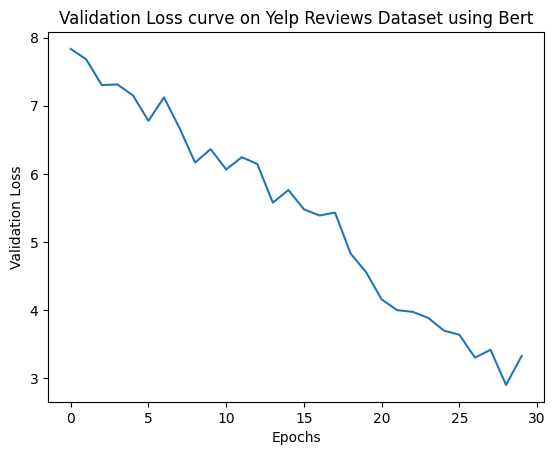

In [122]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data)

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss curve on Yelp Reviews Dataset using Bert')

plt.show()


## DistilBert Loss Curve

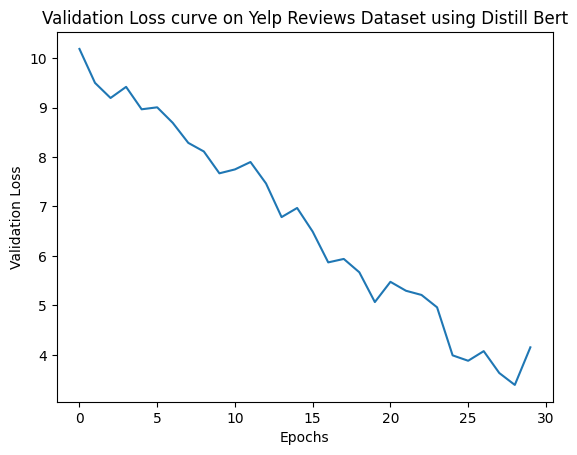

In [124]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data)

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss curve on Yelp Reviews Dataset using Distill Bert')

plt.show()


## Albert Loss curve

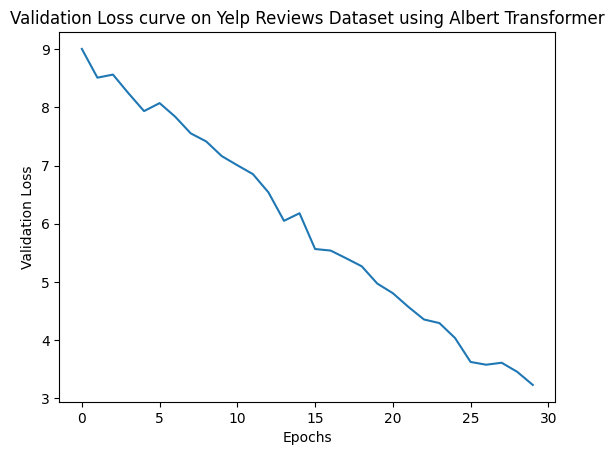

In [128]:
plt.plot(data)

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss curve on Yelp Reviews Dataset using Albert Transformer')

plt.show()


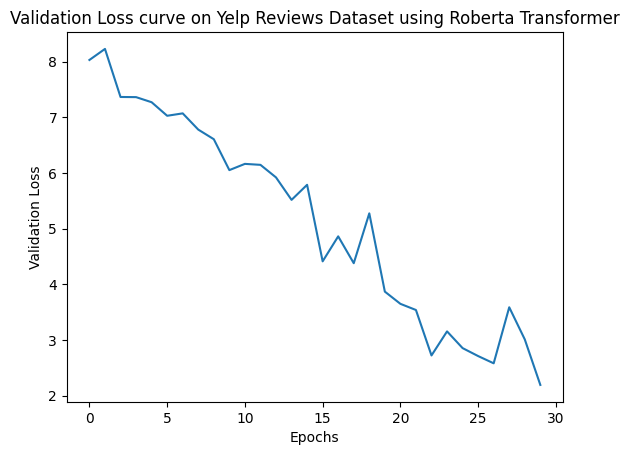

In [132]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data)

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss curve on Yelp Reviews Dataset using Roberta Transformer')

plt.show()


## Distill Bert Model Training Loss

In [154]:
result_df_dis_bert = pd.DataFrame({'Epochs' : range(1,11),
                         'Loss' : distill_bert_data})
result_df_dis_bert['perplexity'] = result_df_dis_bert['Loss'].apply(lambda x : np.exp(x))
result_df_dis_bert

,Epochs,Loss,perplexity
0,1,11.004016,60115.108706
1,2,9.949603,20943.906482
2,3,8.930533,7559.293090
3,4,8.403626,4463.221352
4,5,7.322774,1514.399539
5,6,6.500705,665.610599
6,7,5.766952,319.562250
7,8,4.791068,120.429940
8,9,4.455917,86.135119
9,10,3.405928,30.142253


## Distill Bert Model Training Loss

In [164]:
result_df_dis_bert

,Epochs,Loss,perplexity
0,1,11.004016,60115.108706
1,2,9.949603,20943.906482
2,3,8.930533,7559.293090
3,4,8.403626,4463.221352
4,5,7.322774,1514.399539
5,6,6.500705,665.610599
6,7,5.766952,319.562250
7,8,4.791068,120.429940
8,9,4.455917,86.135119
9,10,3.405928,30.142253


## Albert Model Training Loss

In [156]:
result_df_albert = pd.DataFrame({'Epochs' : range(1,11),
                         'Loss' : albert_data})

result_df_albert['perplexity'] = result_df_albert['Loss'].apply(lambda x : np.exp(x))
result_df_albert

,Epochs,Loss,perplexity
0,1,9.171308,9617.197755
1,2,8.951017,7715.731495
2,3,7.863577,2600.807256
3,4,7.215315,1360.101679
4,5,7.263971,1427.914913
5,6,6.002040,404.252499
6,7,4.862526,129.350549
7,8,4.649932,104.577846
8,9,3.777681,43.714558
9,10,2.758860,15.781843


## Albert Model Training Loss

In [165]:
result_df_albert

,Epochs,Loss,perplexity
0,1,9.171308,9617.197755
1,2,8.951017,7715.731495
2,3,7.863577,2600.807256
3,4,7.215315,1360.101679
4,5,7.263971,1427.914913
5,6,6.002040,404.252499
6,7,4.862526,129.350549
7,8,4.649932,104.577846
8,9,3.777681,43.714558
9,10,2.758860,15.781843


## Bert Model Training Loss

In [160]:
result_df_bert = pd.DataFrame({'Epochs' : range(1,11),
                         'Loss' : bert_data})

result_df_bert['perplexity'] = result_df_bert['Loss'].apply(lambda x : np.exp(x))
result_df_bert

,Epochs,Loss,perplexity
0,1,9.940946,20763.370562
1,2,9.331098,11283.518625
2,3,8.534450,5087.031005
3,4,7.489810,1789.712552
4,5,6.845112,939.278245
5,6,6.100550,446.103164
6,7,5.297325,199.801636
7,8,4.671700,106.879286
8,9,4.001611,54.686179
9,10,2.989039,19.866576


## Bert Model Training Loss

In [166]:
result_df_bert

,Epochs,Loss,perplexity
0,1,9.940946,20763.370562
1,2,9.331098,11283.518625
2,3,8.534450,5087.031005
3,4,7.489810,1789.712552
4,5,6.845112,939.278245
5,6,6.100550,446.103164
6,7,5.297325,199.801636
7,8,4.671700,106.879286
8,9,4.001611,54.686179
9,10,2.989039,19.866576


## Roberta Model Training Loss

In [163]:
result_df_roberta = pd.DataFrame({'Epochs' : range(1,11),
                         'Loss' : roberta_data})

result_df_roberta['perplexity'] = result_df_roberta['Loss'].apply(lambda x : np.exp(x))
result_df_roberta

,Epochs,Loss,perplexity
0,1,7.140338,1261.854682
1,2,7.758777,2342.039501
2,3,6.209717,497.560503
3,4,6.036339,418.358813
4,5,5.136130,170.056319
5,6,3.752814,42.640897
6,7,3.157083,23.501941
7,8,3.760667,42.977096
8,9,3.178656,24.014448
9,10,1.446373,4.247682


## Roberta Model Training Loss

In [168]:
result_df_roberta

,Epochs,Loss,perplexity
0,1,7.140338,1261.854682
1,2,7.758777,2342.039501
2,3,6.209717,497.560503
3,4,6.036339,418.358813
4,5,5.136130,170.056319
5,6,3.752814,42.640897
6,7,3.157083,23.501941
7,8,3.760667,42.977096
8,9,3.178656,24.014448
9,10,1.446373,4.247682


In [34]:
happy_wp.predict_mask('What do you [MASK] to achieve?')

[WordPredictionResult(token='want', score=0.33324864506721497)]

In [19]:
happy_wp.predict_mask("Whether you’re a [MASK] fan or not, what do you like about Super Bowl Sunday?",top_k = 10)

[WordPredictionResult(token='football', score=0.2212836891412735),
 WordPredictionResult(token='patriots', score=0.050916995853185654),
 WordPredictionResult(token='mets', score=0.04337412863969803),
 WordPredictionResult(token='yankees', score=0.038530077785253525),
 WordPredictionResult(token='giants', score=0.024569109082221985),
 WordPredictionResult(token='steelers', score=0.023712454363703728),
 WordPredictionResult(token='big', score=0.021356742829084396),
 WordPredictionResult(token='sports', score=0.019643742591142654),
 WordPredictionResult(token='baseball', score=0.019318172708153725),
 WordPredictionResult(token='philadelphia', score=0.013063603080809116)]

In [4]:
happy_wp.predict_mask("Whether you’re a [MASK] fan or not, what do you like about Super Bowl Sunday?",top_k = 10)

[WordPredictionResult(token='football', score=0.19990402460098267),
 WordPredictionResult(token='mets', score=0.04293298348784447),
 WordPredictionResult(token='yankees', score=0.03869093954563141),
 WordPredictionResult(token='sports', score=0.030451619997620583),
 WordPredictionResult(token='super', score=0.029325129464268684),
 WordPredictionResult(token='big', score=0.02295086719095707),
 WordPredictionResult(token='huge', score=0.02233283966779709),
 WordPredictionResult(token='baseball', score=0.02199205383658409),
 WordPredictionResult(token='patriots', score=0.016061268746852875),
 WordPredictionResult(token='trump', score=0.014306197874248028)]

In [5]:
happy_wp.predict_mask("Whose hand is busy behind the [MASK]?",top_k = 10)

[WordPredictionResult(token='door', score=0.07631545513868332),
 WordPredictionResult(token='wheel', score=0.05655690282583237),
 WordPredictionResult(token='desk', score=0.0386175699532032),
 WordPredictionResult(token='counter', score=0.02867591567337513),
 WordPredictionResult(token='table', score=0.021399453282356262),
 WordPredictionResult(token='curtain', score=0.017598211765289307),
 WordPredictionResult(token='wall', score=0.015271885320544243),
 WordPredictionResult(token='camera', score=0.011721779592335224),
 WordPredictionResult(token='window', score=0.010755416937172413),
 WordPredictionResult(token='corner', score=0.010321044363081455)]

In [6]:
happy_wp.predict_mask("I don't think it is a [MASK] idea?",top_k = 10)

[WordPredictionResult(token='good', score=0.5170599818229675),
 WordPredictionResult(token='bad', score=0.250016450881958),
 WordPredictionResult(token='great', score=0.026395078748464584),
 WordPredictionResult(token='right', score=0.0131422383710742),
 WordPredictionResult(token='crazy', score=0.010699343867599964),
 WordPredictionResult(token='wise', score=0.010435260832309723),
 WordPredictionResult(token='terrible', score=0.008386646397411823),
 WordPredictionResult(token='better', score=0.006799934431910515),
 WordPredictionResult(token='real', score=0.006471180822700262),
 WordPredictionResult(token='big', score=0.00597213814035058)]

In [7]:
happy_wp.predict_mask("I don't think it should be a [MASK] for me?",top_k = 10)

[WordPredictionResult(token='home', score=0.07270095497369766),
 WordPredictionResult(token='day', score=0.03379082307219505),
 WordPredictionResult(token='job', score=0.033371806144714355),
 WordPredictionResult(token='test', score=0.03258473053574562),
 WordPredictionResult(token='place', score=0.02559639699757099),
 WordPredictionResult(token='present', score=0.01687128283083439),
 WordPredictionResult(token='problem', score=0.01579517498612404),
 WordPredictionResult(token='ride', score=0.0157153457403183),
 WordPredictionResult(token='treat', score=0.013776817359030247),
 WordPredictionResult(token='thing', score=0.012804425321519375)]